# Enterprise Data Science_COVID-19

### Author: Akanksha Parashar¶
### Matrikelnummer: 423022

## Notebook Description
- With this notebook, we will perform trivial forecasting. Then, we will do cross-validation and try to use the diagonal plot for a better understanding.
- The dataset of the COVID is taken from John Hopkins COVID-19 GitHub page.
- The datapath given in this notebook is of user's computer folder where the required csv files are saved.
- The data source is given in the Readme file.

# Forecasting - Facebook Prophet
https://facebook.github.io/prophet/

https://research.fb.com/blog/2017/02/prophet-forecasting-at-scale/

https://peerj.com/preprints/3190.pdf

In [58]:
# Facebook prophet is implemented by facebook and it is specially used by retailers

In [59]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt





%matplotlib inline
mpl.rcParams['figure.figsize'] = (16, 10)
pd.set_option('display.max_rows', 500)

import plotly.graph_objects as go

In [60]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


In [61]:
#attention might have problems with holiday package, 
#downgrate holidays via: pip install 'holidays==0.9.12'
from prophet import Prophet 

In [62]:
%matplotlib inline
plt.style.use('fivethirtyeight')
# here we have use this style for plotting the graph below 
# matplotlib provides us different graph styles to use in our python notebook

In [63]:
# Before we build forecast mode, first thing you have to know how can we judge if the forecast is good or not
# For this we will start with trivial forecast reference model, Reference model gives us guidance whether we are doing it in a correct way or not
# ... there is really improvement with the more heavy weight machine learning model

# Trivial Forecasting (Rolling Mean)
- The most often used Trivial forecasting model is rolling mean which means we average over a sliding window

In [64]:
# the final trivial model is at the end of this file

df = pd.DataFrame({'X': np.arange(0,10)}) # generate an input df
df['y']=df.rolling(3).mean() # take the window (of 3 days) and write the average as the result using mean function
# This rolling function we are applying on the dataframe that we have generated
# This rolling will give a stable forecast in case where data doesn't move too much.

In [65]:
df
# this is a toy data
# for example x on day 2(add three days i.e 0+1+2 = 3 then avg will be 3/3 = 1 that is placed in y on day 2)

,X,y
0,0,NaN
1,1,NaN
2,2,1.0
3,3,2.0
4,4,3.0
5,5,4.0
6,6,5.0
7,7,6.0
8,8,7.0
9,9,8.0


# Small data set

In [66]:
df_all = pd.read_csv('C:\\Users\\hp\\Documents\\Covid-19-master\\COVID-19-master\\COVID-19-master\\csse_covid_19_data\\csse_covid_19_time_series\\Processed\\COVID-small-flat-table.csv',sep=';')
df_all

,Unnamed: 0,Date,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,0,2020-01-22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2020-01-23,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2,2020-01-24,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,3,2020-01-25,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,4,2020-01-26,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836,836,2022-05-07,178922,275341,265794,41717,99287,11,7663,9083673,...,899723,238695,7734,522672,10673915,657060,535,11819,320099,248214
837,837,2022-05-08,178981,275366,265798,41717,99287,11,7663,9101319,...,899723,238695,7785,522749,10676184,657060,535,11819,320099,248352
838,838,2022-05-09,179010,275372,265800,41717,99287,11,7663,9101319,...,899723,238736,8056,522749,10678359,657193,535,11819,320157,248536
839,839,2022-05-10,179017,275416,265804,41717,99287,11,7663,9101319,...,902540,238743,8063,522749,10681214,657193,535,11819,320226,248642


In [67]:
df=df_all[['Date','Germany']]
df=df.rename(columns={'Date': 'ds',
                        'Germany': 'y'})

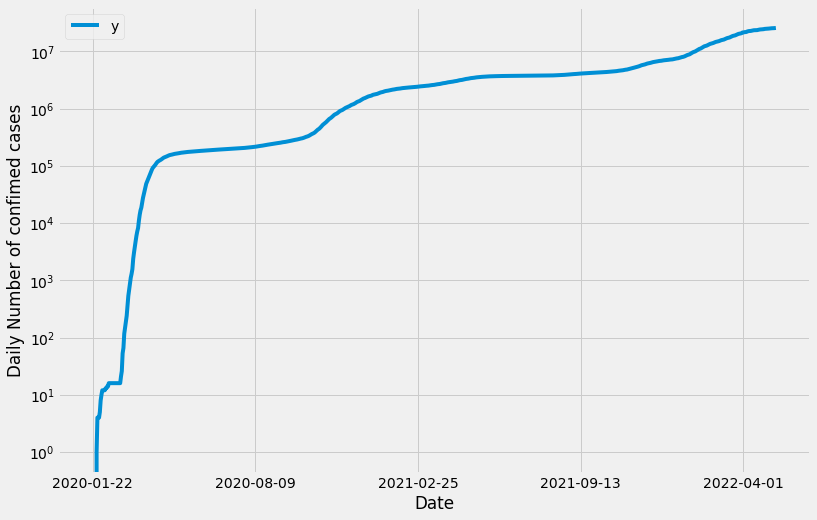

In [68]:
ax = df.set_index('ds').plot(figsize=(12, 8),
                             logy=True) # converting the graph to logarithmic style
ax.set_ylabel('Daily Number of confimed cases')
ax.set_xlabel('Date')

plt.show()


In [69]:
# set the uncertainty interval to 95% (the Prophet default is 80%)

#my_model = Prophet(interval_width=0.95) # piecwise linear model
my_model = Prophet(growth='logistic')   # logistic model

In [70]:
my_model

In [71]:
# now we will fit our model
# the column 'cap' is only mandatory for the logistic model
df['cap']=1000000.
my_model.fit(df)
# Fit means to train the model
# The process involves running an algorithm on data for which the target variable (“labeled” data)... 
#...is known to produce a machine learning model.

21:46:15 - cmdstanpy - INFO - Chain [1] start processing
21:46:15 - cmdstanpy - INFO - Chain [1] done processing


In [72]:
# define the periods and the frequency 'D'== days
# periods 7 and frequency day wise means you are adding 7 new dates for which you want to predict
# if periods 7 and frequency month wise the it would add 7 new months
future_dates = my_model.make_future_dataframe(periods=7, freq='D')
future_dates['cap']=1000000. # only mandatory for the logistic model
future_dates.tail()

,ds,cap
843,2022-05-14,1000000.0
844,2022-05-15,1000000.0
845,2022-05-16,1000000.0
846,2022-05-17,1000000.0
847,2022-05-18,1000000.0


In [73]:
# predict according to the scikit-learn standard

forecast = my_model.predict(future_dates)

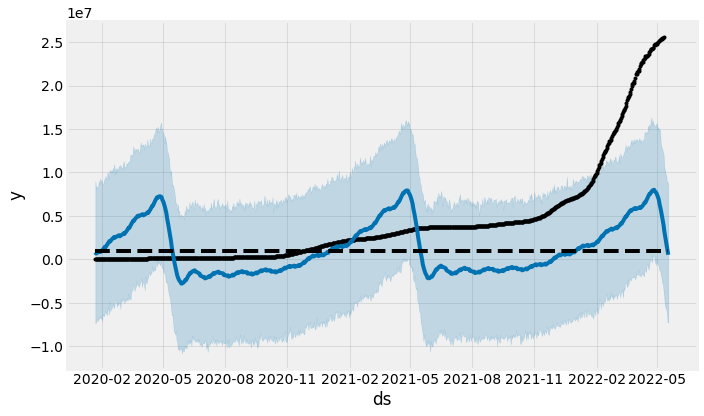

In [74]:
my_model.plot(forecast,
              uncertainty=True ); # since fbprohet is rendering the output
# we put semicolon because sometimes fbprophet/prophet plot two images, so to avoid that we put semicolon in the end

In [75]:
# we are not able to figure out anything from above graph thats why we use ploty to plot the data

In [76]:
import plotly.offline as py
from prophet.plot import plot_plotly

fig = plot_plotly(my_model, forecast)  # This returns a plotly Figure

fig.update_layout(
    width=1024,
    height=900,
    xaxis_title="Time",
    yaxis_title="Confirmed infected people (source johns hopkins csse, log-scale)",
)
fig.update_yaxes(type="log",range=[1.1,8.5])
py.iplot(fig)

In [77]:
# the dots are the input data and line is the predicted data
# on the basis of historic data, they are calculating the error boundaries for our model.(light blue zig zag )

In [78]:
forecast.sort_values(by='ds').head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,139911.882279,1000000.0,-7.351797e+06,8.996419e+06,139911.882279,139911.882279,672994.851649,672994.851649,672994.851649,71230.783101,71230.783101,71230.783101,601764.068548,601764.068548,601764.068548,0.0,0.0,0.0,812906.733928
1,2020-01-23,141233.893913,1000000.0,-7.209373e+06,8.097341e+06,141233.893913,141233.893913,534113.156181,534113.156181,534113.156181,-71837.972988,-71837.972988,-71837.972988,605951.129169,605951.129169,605951.129169,0.0,0.0,0.0,675347.050094
2,2020-01-24,142566.326515,1000000.0,-7.120225e+06,8.455932e+06,142566.326515,142566.326515,572547.067566,572547.067566,572547.067566,-41053.121414,-41053.121414,-41053.121414,613600.188980,613600.188980,613600.188980,0.0,0.0,0.0,715113.394081
3,2020-01-25,143909.223071,1000000.0,-6.777286e+06,8.116262e+06,143909.223071,143909.223071,611435.969455,611435.969455,611435.969455,-14350.191163,-14350.191163,-14350.191163,625786.160619,625786.160619,625786.160619,0.0,0.0,0.0,755345.192526
4,2020-01-26,145262.625978,1000000.0,-7.052516e+06,8.191330e+06,145262.625978,145262.625978,644928.542525,644928.542525,644928.542525,1444.540573,1444.540573,1444.540573,643484.001952,643484.001952,643484.001952,0.0,0.0,0.0,790191.168503


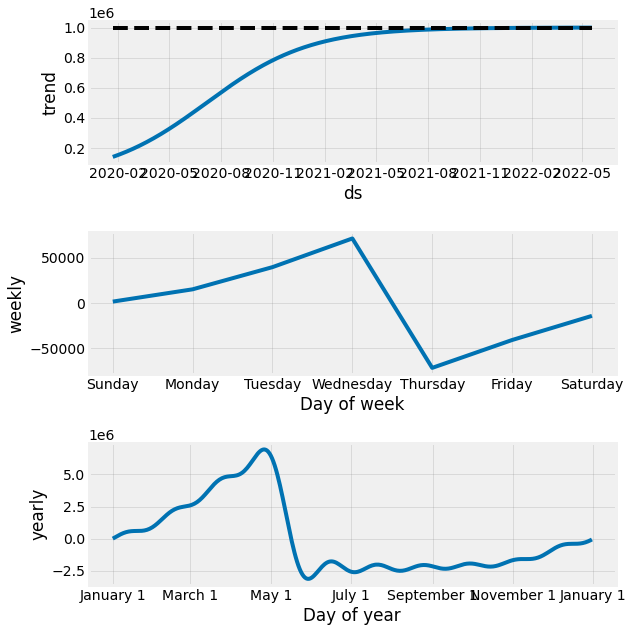

In [79]:
my_model.plot_components(forecast);
# facebook plots are really bad as we are not able to figure out anything

<AxesSubplot:xlabel='ds'>

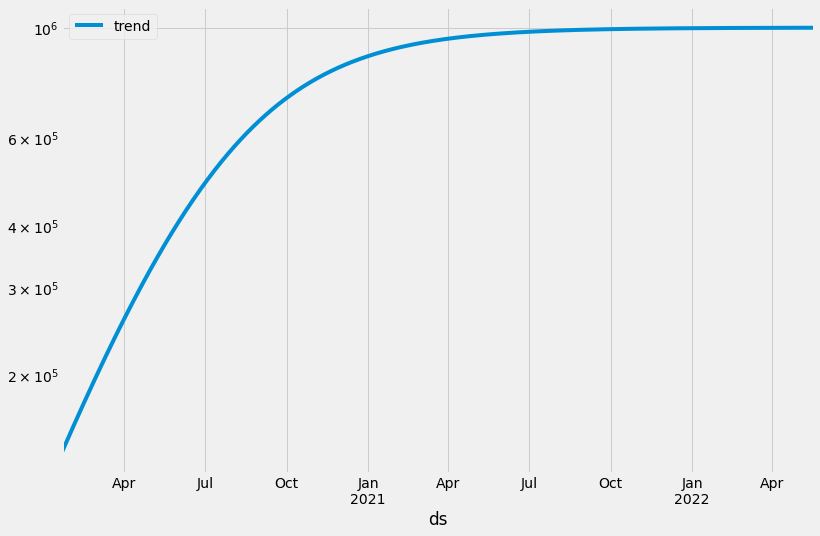

In [80]:
# this is the trend model of the facebook prophet
forecast[['ds','trend']].set_index('ds').plot(figsize=(12, 8),logy=True)

In [81]:
# till now we have predicted the new 7 days based on previous trend in one shot which we can't tell whether it is correct or not
# but to do this in a rolling fashion (to take the next window and predict the next 7 days)we use other technique...
# ...called cross validation

# Cross validation

In [82]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(my_model, 
                         initial='40 days', # we take the first 30 days for training
                         period='1 days',  # every  days a new prediction run
                         horizon = '7 days') #we predict 7days into the future

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


21:46:30 - cmdstanpy - INFO - Chain [1] start processing
21:47:06 - cmdstanpy - INFO - Chain [1] done processing
21:47:11 - cmdstanpy - INFO - Chain [1] start processing
21:48:08 - cmdstanpy - INFO - Chain [1] done processing
21:48:12 - cmdstanpy - INFO - Chain [1] start processing
21:48:49 - cmdstanpy - INFO - Chain [1] done processing
21:48:52 - cmdstanpy - INFO - Chain [1] start processing
21:49:15 - cmdstanpy - INFO - Chain [1] done processing
21:49:19 - cmdstanpy - INFO - Chain [1] start processing
21:50:06 - cmdstanpy - INFO - Chain [1] done processing
21:50:08 - cmdstanpy - INFO - Chain [1] start processing
21:50:26 - cmdstanpy - INFO - Chain [1] done processing
21:50:28 - cmdstanpy - INFO - Chain [1] start processing
21:50:37 - cmdstanpy - INFO - Chain [1] done processing
21:50:39 - cmdstanpy - INFO - Chain [1] start processing
21:50:59 - cmdstanpy - INFO - Chain [1] done processing
21:51:01 - cmdstanpy - INFO - Chain [1] start processing
21:51:17 - cmdstanpy - INFO - Chain [1]

21:56:01 - cmdstanpy - INFO - Chain [1] done processing
21:56:03 - cmdstanpy - INFO - Chain [1] start processing
21:56:03 - cmdstanpy - INFO - Chain [1] done processing
21:56:05 - cmdstanpy - INFO - Chain [1] start processing
21:56:05 - cmdstanpy - INFO - Chain [1] done processing
21:56:07 - cmdstanpy - INFO - Chain [1] start processing
21:56:07 - cmdstanpy - INFO - Chain [1] done processing
21:56:09 - cmdstanpy - INFO - Chain [1] start processing
21:56:09 - cmdstanpy - INFO - Chain [1] done processing
21:56:11 - cmdstanpy - INFO - Chain [1] start processing
21:56:11 - cmdstanpy - INFO - Chain [1] done processing
21:56:13 - cmdstanpy - INFO - Chain [1] start processing
21:56:14 - cmdstanpy - INFO - Chain [1] done processing
21:56:15 - cmdstanpy - INFO - Chain [1] start processing
21:56:16 - cmdstanpy - INFO - Chain [1] done processing
21:56:18 - cmdstanpy - INFO - Chain [1] start processing
21:56:18 - cmdstanpy - INFO - Chain [1] done processing
21:56:20 - cmdstanpy - INFO - Chain [1] 

21:58:30 - cmdstanpy - INFO - Chain [1] done processing
21:58:32 - cmdstanpy - INFO - Chain [1] start processing
21:58:32 - cmdstanpy - INFO - Chain [1] done processing
21:58:34 - cmdstanpy - INFO - Chain [1] start processing
21:58:34 - cmdstanpy - INFO - Chain [1] done processing
21:58:36 - cmdstanpy - INFO - Chain [1] start processing
21:58:36 - cmdstanpy - INFO - Chain [1] done processing
21:58:38 - cmdstanpy - INFO - Chain [1] start processing
21:58:38 - cmdstanpy - INFO - Chain [1] done processing
21:58:39 - cmdstanpy - INFO - Chain [1] start processing
21:58:40 - cmdstanpy - INFO - Chain [1] done processing
21:58:41 - cmdstanpy - INFO - Chain [1] start processing
21:58:41 - cmdstanpy - INFO - Chain [1] done processing
21:58:43 - cmdstanpy - INFO - Chain [1] start processing
21:58:43 - cmdstanpy - INFO - Chain [1] done processing
21:58:45 - cmdstanpy - INFO - Chain [1] start processing
21:58:45 - cmdstanpy - INFO - Chain [1] done processing
21:58:46 - cmdstanpy - INFO - Chain [1] 

22:00:46 - cmdstanpy - INFO - Chain [1] done processing
22:00:47 - cmdstanpy - INFO - Chain [1] start processing
22:00:48 - cmdstanpy - INFO - Chain [1] done processing
22:00:49 - cmdstanpy - INFO - Chain [1] start processing
22:00:49 - cmdstanpy - INFO - Chain [1] done processing
22:00:51 - cmdstanpy - INFO - Chain [1] start processing
22:00:51 - cmdstanpy - INFO - Chain [1] done processing
22:00:53 - cmdstanpy - INFO - Chain [1] start processing
22:00:53 - cmdstanpy - INFO - Chain [1] done processing
22:00:55 - cmdstanpy - INFO - Chain [1] start processing
22:00:55 - cmdstanpy - INFO - Chain [1] done processing
22:00:56 - cmdstanpy - INFO - Chain [1] start processing
22:00:57 - cmdstanpy - INFO - Chain [1] done processing
22:00:59 - cmdstanpy - INFO - Chain [1] start processing
22:00:59 - cmdstanpy - INFO - Chain [1] done processing
22:01:01 - cmdstanpy - INFO - Chain [1] start processing
22:01:01 - cmdstanpy - INFO - Chain [1] done processing
22:01:02 - cmdstanpy - INFO - Chain [1] 

22:03:01 - cmdstanpy - INFO - Chain [1] done processing
22:03:03 - cmdstanpy - INFO - Chain [1] start processing
22:03:03 - cmdstanpy - INFO - Chain [1] done processing
22:03:05 - cmdstanpy - INFO - Chain [1] start processing
22:03:05 - cmdstanpy - INFO - Chain [1] done processing
22:03:07 - cmdstanpy - INFO - Chain [1] start processing
22:03:07 - cmdstanpy - INFO - Chain [1] done processing
22:03:09 - cmdstanpy - INFO - Chain [1] start processing
22:03:09 - cmdstanpy - INFO - Chain [1] done processing
22:03:10 - cmdstanpy - INFO - Chain [1] start processing
22:03:10 - cmdstanpy - INFO - Chain [1] done processing
22:03:12 - cmdstanpy - INFO - Chain [1] start processing
22:03:12 - cmdstanpy - INFO - Chain [1] done processing
22:03:14 - cmdstanpy - INFO - Chain [1] start processing
22:03:14 - cmdstanpy - INFO - Chain [1] done processing
22:03:15 - cmdstanpy - INFO - Chain [1] start processing
22:03:15 - cmdstanpy - INFO - Chain [1] done processing
22:03:17 - cmdstanpy - INFO - Chain [1] 

22:05:12 - cmdstanpy - INFO - Chain [1] done processing
22:05:14 - cmdstanpy - INFO - Chain [1] start processing
22:05:14 - cmdstanpy - INFO - Chain [1] done processing
22:05:16 - cmdstanpy - INFO - Chain [1] start processing
22:05:16 - cmdstanpy - INFO - Chain [1] done processing
22:05:17 - cmdstanpy - INFO - Chain [1] start processing
22:05:17 - cmdstanpy - INFO - Chain [1] done processing
22:05:19 - cmdstanpy - INFO - Chain [1] start processing
22:05:19 - cmdstanpy - INFO - Chain [1] done processing
22:05:21 - cmdstanpy - INFO - Chain [1] start processing
22:05:21 - cmdstanpy - INFO - Chain [1] done processing
22:05:22 - cmdstanpy - INFO - Chain [1] start processing
22:05:23 - cmdstanpy - INFO - Chain [1] done processing
22:05:24 - cmdstanpy - INFO - Chain [1] start processing
22:05:24 - cmdstanpy - INFO - Chain [1] done processing
22:05:26 - cmdstanpy - INFO - Chain [1] start processing
22:05:26 - cmdstanpy - INFO - Chain [1] done processing
22:05:28 - cmdstanpy - INFO - Chain [1] 

22:07:22 - cmdstanpy - INFO - Chain [1] done processing
22:07:24 - cmdstanpy - INFO - Chain [1] start processing
22:07:24 - cmdstanpy - INFO - Chain [1] done processing
22:07:26 - cmdstanpy - INFO - Chain [1] start processing
22:07:26 - cmdstanpy - INFO - Chain [1] done processing
22:07:27 - cmdstanpy - INFO - Chain [1] start processing
22:07:27 - cmdstanpy - INFO - Chain [1] done processing
22:07:29 - cmdstanpy - INFO - Chain [1] start processing
22:07:29 - cmdstanpy - INFO - Chain [1] done processing
22:07:31 - cmdstanpy - INFO - Chain [1] start processing
22:07:31 - cmdstanpy - INFO - Chain [1] done processing
22:07:33 - cmdstanpy - INFO - Chain [1] start processing
22:07:33 - cmdstanpy - INFO - Chain [1] done processing
22:07:34 - cmdstanpy - INFO - Chain [1] start processing
22:07:34 - cmdstanpy - INFO - Chain [1] done processing
22:07:36 - cmdstanpy - INFO - Chain [1] start processing
22:07:36 - cmdstanpy - INFO - Chain [1] done processing
22:07:38 - cmdstanpy - INFO - Chain [1] 

02:18:29 - cmdstanpy - INFO - Chain [1] done processing
02:18:32 - cmdstanpy - INFO - Chain [1] start processing
02:18:32 - cmdstanpy - INFO - Chain [1] done processing
02:18:35 - cmdstanpy - INFO - Chain [1] start processing
02:18:35 - cmdstanpy - INFO - Chain [1] done processing
02:18:38 - cmdstanpy - INFO - Chain [1] start processing
02:18:39 - cmdstanpy - INFO - Chain [1] done processing
02:18:42 - cmdstanpy - INFO - Chain [1] start processing
02:18:42 - cmdstanpy - INFO - Chain [1] done processing
02:18:45 - cmdstanpy - INFO - Chain [1] start processing
02:18:46 - cmdstanpy - INFO - Chain [1] done processing
02:18:48 - cmdstanpy - INFO - Chain [1] start processing
02:18:49 - cmdstanpy - INFO - Chain [1] done processing
02:18:52 - cmdstanpy - INFO - Chain [1] start processing
02:18:52 - cmdstanpy - INFO - Chain [1] done processing
02:18:55 - cmdstanpy - INFO - Chain [1] start processing
02:18:55 - cmdstanpy - INFO - Chain [1] done processing
02:18:59 - cmdstanpy - INFO - Chain [1] 

02:23:18 - cmdstanpy - INFO - Chain [1] done processing
02:23:22 - cmdstanpy - INFO - Chain [1] start processing
02:23:23 - cmdstanpy - INFO - Chain [1] done processing
02:23:26 - cmdstanpy - INFO - Chain [1] start processing
02:23:26 - cmdstanpy - INFO - Chain [1] done processing
02:23:30 - cmdstanpy - INFO - Chain [1] start processing
02:23:30 - cmdstanpy - INFO - Chain [1] done processing
02:23:33 - cmdstanpy - INFO - Chain [1] start processing
02:23:34 - cmdstanpy - INFO - Chain [1] done processing
02:23:37 - cmdstanpy - INFO - Chain [1] start processing
02:23:37 - cmdstanpy - INFO - Chain [1] done processing
02:23:41 - cmdstanpy - INFO - Chain [1] start processing
02:23:41 - cmdstanpy - INFO - Chain [1] done processing
02:23:45 - cmdstanpy - INFO - Chain [1] start processing
02:23:45 - cmdstanpy - INFO - Chain [1] done processing
02:23:49 - cmdstanpy - INFO - Chain [1] start processing
02:23:50 - cmdstanpy - INFO - Chain [1] done processing
02:23:53 - cmdstanpy - INFO - Chain [1] 

02:28:14 - cmdstanpy - INFO - Chain [1] done processing
02:28:17 - cmdstanpy - INFO - Chain [1] start processing
02:28:18 - cmdstanpy - INFO - Chain [1] done processing
02:28:21 - cmdstanpy - INFO - Chain [1] start processing
02:28:21 - cmdstanpy - INFO - Chain [1] done processing
02:28:24 - cmdstanpy - INFO - Chain [1] start processing
02:28:24 - cmdstanpy - INFO - Chain [1] done processing
02:28:27 - cmdstanpy - INFO - Chain [1] start processing
02:28:27 - cmdstanpy - INFO - Chain [1] done processing
02:28:30 - cmdstanpy - INFO - Chain [1] start processing
02:28:30 - cmdstanpy - INFO - Chain [1] done processing
02:28:33 - cmdstanpy - INFO - Chain [1] start processing
02:28:33 - cmdstanpy - INFO - Chain [1] done processing
02:28:36 - cmdstanpy - INFO - Chain [1] start processing
02:28:37 - cmdstanpy - INFO - Chain [1] done processing
02:28:40 - cmdstanpy - INFO - Chain [1] start processing
02:28:40 - cmdstanpy - INFO - Chain [1] done processing
02:28:43 - cmdstanpy - INFO - Chain [1] 

02:34:51 - cmdstanpy - INFO - Chain [1] done processing
02:34:58 - cmdstanpy - INFO - Chain [1] start processing
02:34:59 - cmdstanpy - INFO - Chain [1] done processing
02:35:04 - cmdstanpy - INFO - Chain [1] start processing
02:35:04 - cmdstanpy - INFO - Chain [1] done processing
02:35:09 - cmdstanpy - INFO - Chain [1] start processing
02:35:09 - cmdstanpy - INFO - Chain [1] done processing
02:35:14 - cmdstanpy - INFO - Chain [1] start processing
02:35:14 - cmdstanpy - INFO - Chain [1] done processing
02:35:19 - cmdstanpy - INFO - Chain [1] start processing
02:35:19 - cmdstanpy - INFO - Chain [1] done processing
02:35:24 - cmdstanpy - INFO - Chain [1] start processing
02:35:24 - cmdstanpy - INFO - Chain [1] done processing
02:35:29 - cmdstanpy - INFO - Chain [1] start processing
02:35:29 - cmdstanpy - INFO - Chain [1] done processing
02:35:34 - cmdstanpy - INFO - Chain [1] start processing
02:35:34 - cmdstanpy - INFO - Chain [1] done processing
02:35:39 - cmdstanpy - INFO - Chain [1] 

In [83]:
df_cv.sort_values(by=['cutoff','ds'])[0:14]
df_cv.head(10)
# here 2nd february will use the historic data to predict next seven days and same continues with other dates

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,209.497127,206.879825,211.929151,188,2020-03-02
1,2020-03-04,278.613218,275.344265,281.742668,240,2020-03-02
2,2020-03-05,362.477181,358.650534,366.284801,349,2020-03-02
3,2020-03-06,465.973276,460.488706,470.990207,534,2020-03-02
4,2020-03-07,583.659417,576.297867,590.798938,684,2020-03-02
5,2020-03-08,725.589738,716.281302,734.989782,847,2020-03-02
6,2020-03-09,881.140448,868.934424,892.241126,1112,2020-03-02
7,2020-03-04,222.818337,219.286919,227.459110,240,2020-03-03
8,2020-03-05,252.106416,236.102107,270.788873,349,2020-03-03
9,2020-03-06,298.882107,257.434764,336.387171,534,2020-03-03


In [84]:
df[['ds','y']][30:]

,ds,y
30,2020-02-21,16
31,2020-02-22,16
32,2020-02-23,16
33,2020-02-24,16
34,2020-02-25,16
...,...,...
836,2022-05-07,25295950
837,2022-05-08,25299300
838,2022-05-09,25406868
839,2022-05-10,25503878


In [85]:
df_cv.sort_values(by=['cutoff','ds'])[0:12]
df_cv.head(10)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2020-03-03,209.497127,206.879825,211.929151,188,2020-03-02
1,2020-03-04,278.613218,275.344265,281.742668,240,2020-03-02
2,2020-03-05,362.477181,358.650534,366.284801,349,2020-03-02
3,2020-03-06,465.973276,460.488706,470.990207,534,2020-03-02
4,2020-03-07,583.659417,576.297867,590.798938,684,2020-03-02
5,2020-03-08,725.589738,716.281302,734.989782,847,2020-03-02
6,2020-03-09,881.140448,868.934424,892.241126,1112,2020-03-02
7,2020-03-04,222.818337,219.286919,227.459110,240,2020-03-03
8,2020-03-05,252.106416,236.102107,270.788873,349,2020-03-03
9,2020-03-06,298.882107,257.434764,336.387171,534,2020-03-03


In [86]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)

In [87]:
# the performance matrix shows the result for all horizon
# the smaller the horizon the better would be the prediction
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,3.719981e+13,6.099165e+06,3.322918e+06,0.432334,0.496605,0.693307,0.080605
1,2 days,3.954937e+13,6.288829e+06,3.441274e+06,0.450966,0.515315,0.734906,0.041562
2,3 days,4.196785e+13,6.478260e+06,3.559941e+06,0.469156,0.533906,0.777540,0.022670
3,4 days,4.443321e+13,6.665824e+06,3.677904e+06,0.488148,0.557224,0.822069,0.016373
4,5 days,4.692739e+13,6.850357e+06,3.794317e+06,0.507747,0.576192,0.868144,0.007557
5,6 days,4.942300e+13,7.030149e+06,3.908151e+06,0.526810,0.592260,0.913168,0.008816
6,7 days,5.189268e+13,7.203658e+06,4.018486e+06,0.546264,0.612482,0.953672,0.006297


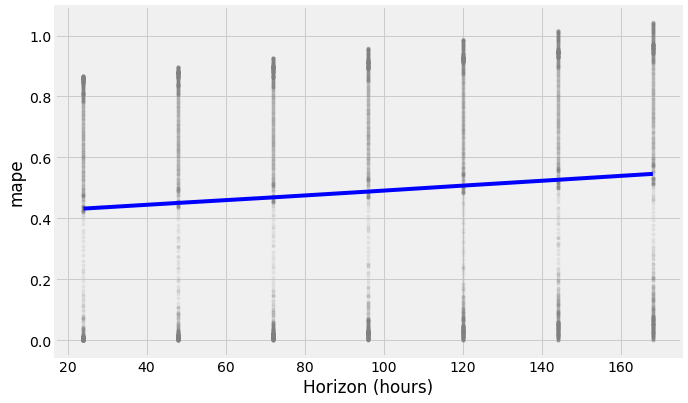

In [88]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape',)
# in graph below you can see the error in starting is 0.42(42%) then it is going finall to 0.58(58%)

# Diagonalplot
- gives a good understanding for the under and over estimation w.r.t. magnitude

In [89]:
# Every forecast model should be checked by the diagonal plot
# This to find out if you have bias, underestimating or overestimating

In [90]:
horizon='7 days'
df_cv['horizon']=df_cv.ds-df_cv.cutoff

date_vec=df_cv[df_cv['horizon']==horizon]['ds']
y_hat=df_cv[df_cv['horizon']==horizon]['yhat']
y=df_cv[df_cv['horizon']==horizon]['y']

In [91]:
df_cv_7=df_cv[df_cv['horizon']==horizon]
df_cv_7.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff,horizon
5529,2022-05-07,744451.471891,-6.753060e+06,7.436597e+06,25295950,2022-04-30,7 days
5536,2022-05-08,726888.420152,-6.825570e+06,7.599411e+06,25299300,2022-05-01,7 days
5543,2022-05-09,691480.644012,-6.721309e+06,8.228602e+06,25406868,2022-05-02,7 days
5550,2022-05-10,674502.357846,-6.656165e+06,8.126481e+06,25503878,2022-05-03,7 days
5557,2022-05-11,664938.703272,-6.831788e+06,7.951778e+06,25592839,2022-05-04,7 days


In [92]:
type(df_cv['horizon'][0])

pandas._libs.tslibs.timedeltas.Timedelta

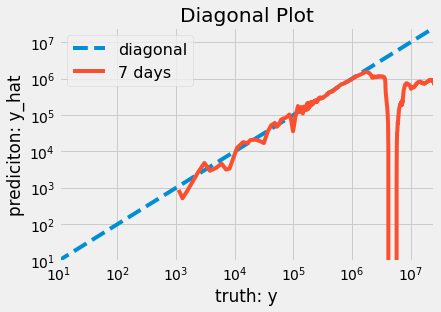

In [93]:
fig, ax = plt.subplots(1, 1)


ax.plot(np.arange(max(y)),np.arange(max(y)),'--',label='diagonal')
ax.plot(y,y_hat,'-',label=horizon)  # horizon is a np.timedelta objct

ax.set_title('Diagonal Plot')
ax.set_ylim(10, max(y))

ax.set_xlabel('truth: y')
ax.set_ylabel('prediciton: y_hat')
ax.set_yscale('log')

ax.set_xlim(10, max(y))
ax.set_xscale('log')
ax.legend(loc='best',
           prop={'size': 16});

# Trivial Forecast
- Example trivial forecast, prediciton 7 days into the future

In [94]:
def mean_absolute_percentage_error(y_true, y_pred): 
    ''' MAPE calculation '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [95]:
parse_dates=['Date']
df_all = pd.read_csv('C:/Users/hp/Documents/ads_covid_19/data/processed/COVID_small_flat_table.csv',sep=';',parse_dates=parse_dates)
df_trivial=df_all[['Date','Germany']]
df_trivial=df_trivial.rename(columns={'Date': 'ds',
                        'Germany': 'y'})

# One of the standard forecast is a rolling mean
- An other standard forecast is the exponentially-weighted moving average, see pandas.ewma

In [96]:
df_trivial['y_mean_r3']=df_trivial.y.rolling(3).mean() # take the average of 3 days

In [97]:
# the result has to be shifted according to the prediciton horizon (here 7 days)

df_trivial['cutoff']=df_trivial['ds'].shift(7)
df_trivial['y_hat']=df_trivial['y_mean_r3'].shift(7)
df_trivial['horizon']=df_trivial['ds']-df_trivial['cutoff']
print('MAPE: '+str(mean_absolute_percentage_error(df_trivial['y_hat'].iloc[12:,], df_trivial['y'].iloc[12:,])))
df_trivial

MAPE: 38.44005918684884


,ds,y,y_mean_r3,cutoff,y_hat,horizon
0,2020-01-22,0,NaN,NaT,NaN,NaT
1,2020-01-23,0,NaN,NaT,NaN,NaT
2,2020-01-24,0,0.000000e+00,NaT,NaN,NaT
3,2020-01-25,0,0.000000e+00,NaT,NaN,NaT
4,2020-01-26,0,0.000000e+00,NaT,NaN,NaT
...,...,...,...,...,...,...
836,2022-05-07,25295950,2.526621e+07,2022-04-30,2.477287e+07,7 days
837,2022-05-08,25299300,2.529424e+07,2022-05-01,2.480722e+07,7 days
838,2022-05-09,25406868,2.533404e+07,2022-05-02,2.485031e+07,7 days
839,2022-05-10,25503878,2.540335e+07,2022-05-03,2.492504e+07,7 days


In [98]:
# we have already three results i.e., trivial prediction, piecewise linear prediction,logistic growth modelling 